## Description - Classical ML Models

Five distinct classical machine learning models were selected and evaluated for classifying the area under the curve data derived from brainwave time series, specifically distinguishing between problem-solving and recall tasks. The chosen models included:
 - KNN
 - Logistic Regression
 - SVM
 - Decision Tree
 - Random Forest
 
To identify the optimal solution(s), three validation techniques were employed: cross-fold validation, validation with a dedicated test dataset, and visualization of the confusion matrix.

## Data Preprocessing

### Separate the input and output columns

In [1]:
import pandas as pd

data = pd.read_csv("area_under_curve.csv")
data.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Label
0,17099.267458,18719.659603,0.000000,16531.085677,14241.372044,16014.591076,0.000000,14005.573779,20210.156169,13390.938539,...,17939.091727,18599.079901,11146.124580,0.000000,16501.495172,14527.987858,1724.751042,0.000000,13411.244841,1
1,11198.720300,18034.494223,0.000000,10638.094777,9873.838888,10651.599822,0.000000,10103.227633,14258.112876,11266.480227,...,11566.187760,16072.507083,4980.861282,0.000000,14331.406797,10389.427864,698.552269,0.000000,11762.435847,0
2,11759.988085,13951.123996,19378.781415,12556.104976,13919.691015,10065.378732,11625.817268,11532.015437,17423.918870,11571.261819,...,16049.267047,22875.177018,7477.828144,11555.482578,19023.980067,21727.751956,1820.347673,8161.365913,18038.997118,1
3,15323.164331,17742.255086,26539.714903,13709.487935,12177.496766,11701.420319,19188.046574,12695.649223,16062.281032,11428.816573,...,14820.330323,20204.401936,7329.884952,13204.570131,17277.559869,14531.156166,-292.081546,4763.145038,13344.224953,0
4,11107.305700,9098.477752,0.000000,13752.142985,12020.918779,4061.515408,0.000000,10217.907270,18837.984110,7334.236651,...,13511.564101,18480.740151,4682.758088,0.000000,14374.795867,14601.476676,534.096694,0.000000,10550.715838,0


### Median imputation

In [2]:
def replace_zeros_with_median(df, label_column):
    """Function to replace 0s with median for each column based on the label"""
    
    for column in df.columns:
        # calculate median for each label group
        median_values = df.groupby(label_column)[column].median()

        # replace 0s with median based on the label of each row
        df[column] = df.apply(lambda row: median_values[row[label_column]] if row[column] == 0 else row[column], axis=1)

    return df

In [3]:
data = replace_zeros_with_median(data, "Label")
data.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Label
0,17099.267458,18719.659603,10611.265447,16531.085677,14241.372044,16014.591076,3761.048147,14005.573779,20210.156169,13390.938539,...,17939.091727,18599.079901,11146.124580,2903.246128,16501.495172,14527.987858,1724.751042,-232.061855,13411.244841,1.0
1,11198.720300,18034.494223,7233.162447,10638.094777,9873.838888,10651.599822,4152.945713,10103.227633,14258.112876,11266.480227,...,11566.187760,16072.507083,4980.861282,1057.621655,14331.406797,10389.427864,698.552269,0.000000,11762.435847,0.0
2,11759.988085,13951.123996,19378.781415,12556.104976,13919.691015,10065.378732,11625.817268,11532.015437,17423.918870,11571.261819,...,16049.267047,22875.177018,7477.828144,11555.482578,19023.980067,21727.751956,1820.347673,8161.365913,18038.997118,1.0
3,15323.164331,17742.255086,26539.714903,13709.487935,12177.496766,11701.420319,19188.046574,12695.649223,16062.281032,11428.816573,...,14820.330323,20204.401936,7329.884952,13204.570131,17277.559869,14531.156166,-292.081546,4763.145038,13344.224953,0.0
4,11107.305700,9098.477752,7233.162447,13752.142985,12020.918779,4061.515408,4152.945713,10217.907270,18837.984110,7334.236651,...,13511.564101,18480.740151,4682.758088,1057.621655,14374.795867,14601.476676,534.096694,0.000000,10550.715838,0.0


In [4]:
selected_columns = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]

X = data.loc[:, selected_columns]
X.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,17099.267458,18719.659603,10611.265447,16531.085677,14241.372044,16014.591076,3761.048147,14005.573779,20210.156169,13390.938539,5140.426448,17939.091727,18599.079901,11146.124580,2903.246128,16501.495172,14527.987858,1724.751042,-232.061855,13411.244841
1,11198.720300,18034.494223,7233.162447,10638.094777,9873.838888,10651.599822,4152.945713,10103.227633,14258.112876,11266.480227,3976.212778,11566.187760,16072.507083,4980.861282,1057.621655,14331.406797,10389.427864,698.552269,0.000000,11762.435847
2,11759.988085,13951.123996,19378.781415,12556.104976,13919.691015,10065.378732,11625.817268,11532.015437,17423.918870,11571.261819,13469.210388,16049.267047,22875.177018,7477.828144,11555.482578,19023.980067,21727.751956,1820.347673,8161.365913,18038.997118
3,15323.164331,17742.255086,26539.714903,13709.487935,12177.496766,11701.420319,19188.046574,12695.649223,16062.281032,11428.816573,18221.013524,14820.330323,20204.401936,7329.884952,13204.570131,17277.559869,14531.156166,-292.081546,4763.145038,13344.224953
4,11107.305700,9098.477752,7233.162447,13752.142985,12020.918779,4061.515408,4152.945713,10217.907270,18837.984110,7334.236651,3976.212778,13511.564101,18480.740151,4682.758088,1057.621655,14374.795867,14601.476676,534.096694,0.000000,10550.715838


In [5]:
# For y, we have either 0 or 1. 
# 0 = "Recall"
# 1 = "Maze"

y = data.iloc[:, -1]
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Label, dtype: float64

### Removing rows with missing data

In [6]:
X_cleaned = X.dropna()
X_cleaned.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,17099.267458,18719.659603,10611.265447,16531.085677,14241.372044,16014.591076,3761.048147,14005.573779,20210.156169,13390.938539,5140.426448,17939.091727,18599.079901,11146.124580,2903.246128,16501.495172,14527.987858,1724.751042,-232.061855,13411.244841
1,11198.720300,18034.494223,7233.162447,10638.094777,9873.838888,10651.599822,4152.945713,10103.227633,14258.112876,11266.480227,3976.212778,11566.187760,16072.507083,4980.861282,1057.621655,14331.406797,10389.427864,698.552269,0.000000,11762.435847
2,11759.988085,13951.123996,19378.781415,12556.104976,13919.691015,10065.378732,11625.817268,11532.015437,17423.918870,11571.261819,13469.210388,16049.267047,22875.177018,7477.828144,11555.482578,19023.980067,21727.751956,1820.347673,8161.365913,18038.997118
3,15323.164331,17742.255086,26539.714903,13709.487935,12177.496766,11701.420319,19188.046574,12695.649223,16062.281032,11428.816573,18221.013524,14820.330323,20204.401936,7329.884952,13204.570131,17277.559869,14531.156166,-292.081546,4763.145038,13344.224953
4,11107.305700,9098.477752,7233.162447,13752.142985,12020.918779,4061.515408,4152.945713,10217.907270,18837.984110,7334.236651,3976.212778,13511.564101,18480.740151,4682.758088,1057.621655,14374.795867,14601.476676,534.096694,0.000000,10550.715838


### Remove outliers

In [7]:
Q1 = X_cleaned.quantile(0.25)
Q3 = X_cleaned.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

outliers = ((X_cleaned < lower_bound) | (X_cleaned > upper_bound)).any(axis=1)

X_cleaned = X_cleaned[~outliers]
y_cleaned = y[~outliers]

### Splitting the train and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 20) (5, 20) (18,) (5,)


### Data Augmentation

In [9]:
import numpy as np

augmentation_factor = 2
noise_factor = 0.5

X_train_augmented = np.empty((0, X_train.shape[1]))
y_train_augmented = np.tile(y_train, augmentation_factor)

for i in range(augmentation_factor):
    X_train_noisy = X_train + np.random.normal(0, noise_factor, size=X_train.shape)
    X_train_augmented = np.vstack((X_train_augmented, X_train_noisy))

y_train_augmented = np.tile(y_train, augmentation_factor)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_augmented)

sc.feature_names_in_ = [str(i) for i in range(X_train_augmented.shape[1])]

X_train = sc.fit_transform(X_train_augmented)
y_train = y_train_augmented
X_test = sc.transform(X_test)

C:\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Defining Evaluation Functions

### Confusion Matrix

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test, y_pred, name):
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion Matrix for {name}")
    print(cm)

    plt.figure(figsize=(12, 4))

    # Plot the first heatmap
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    print("Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.")

### K-fold Cross-Validation

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def show_kfold_cross_validation(model, X_train, y_train, X_test, y_test, cv):
    scores = cross_val_score(model, X_train, y_train, cv=cv)

    # Store cross-validation scores in a DataFrame
    cv_results = pd.DataFrame({'Fold': range(1, len(scores) + 1), 'Accuracy': scores})

    # Display cross-validation scores
    print("Cross-Validation Scores:")
    print(cv_results.to_string(index=False))
    
    # Calculate and display mean accuracy
    mean_accuracy = scores.mean()
    print(f'\nMean Accuracy: {mean_accuracy:.3f}')
    
    # Fit the model on the training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and display test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    return y_pred

## Evaluating Models

### KNN

Cross-Validation Scores:
 Fold  Accuracy
    1  0.625000
    2  0.857143
    3  1.000000
    4  0.428571
    5  1.000000

Mean Accuracy: 0.782
Test Accuracy: 0.800
Confusion Matrix for KNN
[[1 0]
 [1 3]]


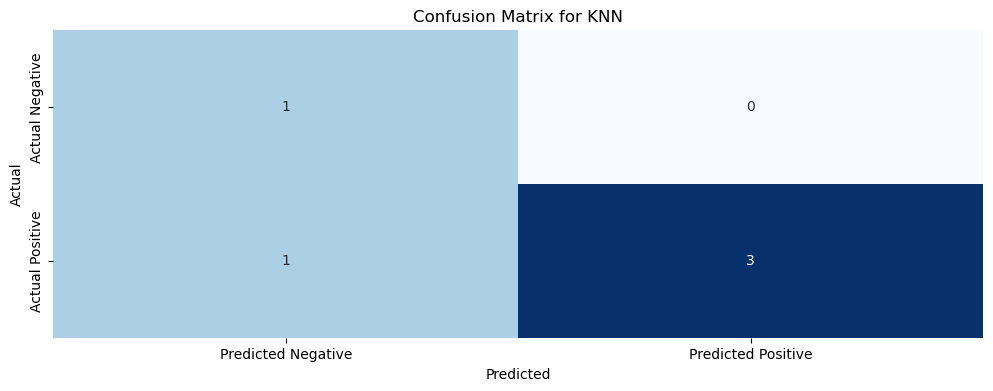

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
y_pred_knn = show_kfold_cross_validation(knn_clf, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_knn, "KNN")

### Logistic Regression

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 0.600
Confusion Matrix for Logistic Regression
[[0 1]
 [1 3]]


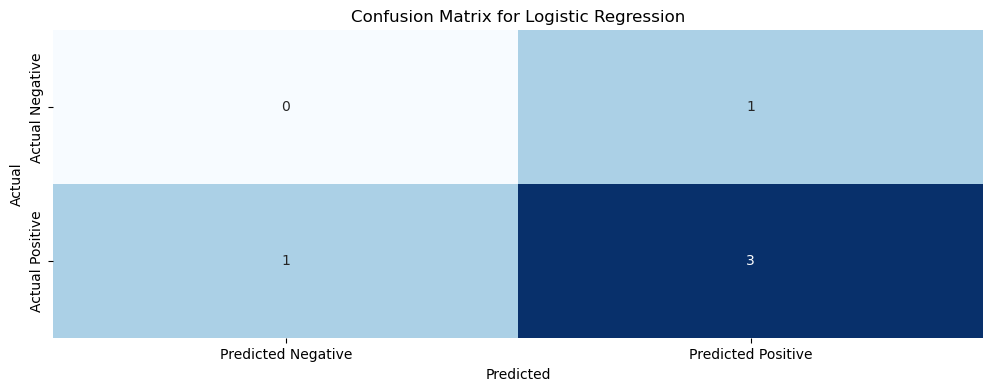

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [14]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=1000)
y_pred_reg = show_kfold_cross_validation(reg_model, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_reg, "Logistic Regression")

### SVM

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 0.600
Confusion Matrix for SVM
[[0 1]
 [1 3]]


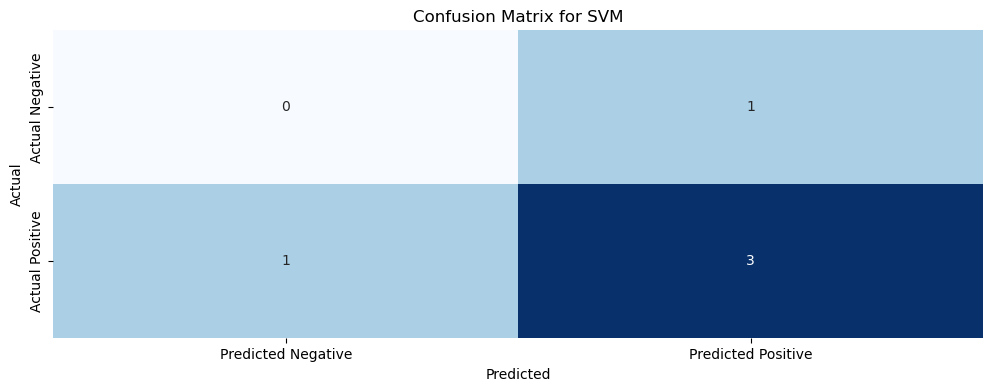

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [15]:
from sklearn.svm import SVC

svmrbf = SVC(kernel='rbf')
y_pred_svm = show_kfold_cross_validation(svmrbf, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_svm, "SVM")

### Decision Tree Classifier

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 0.600
Confusion Matrix for Decision Tree
[[1 0]
 [2 2]]


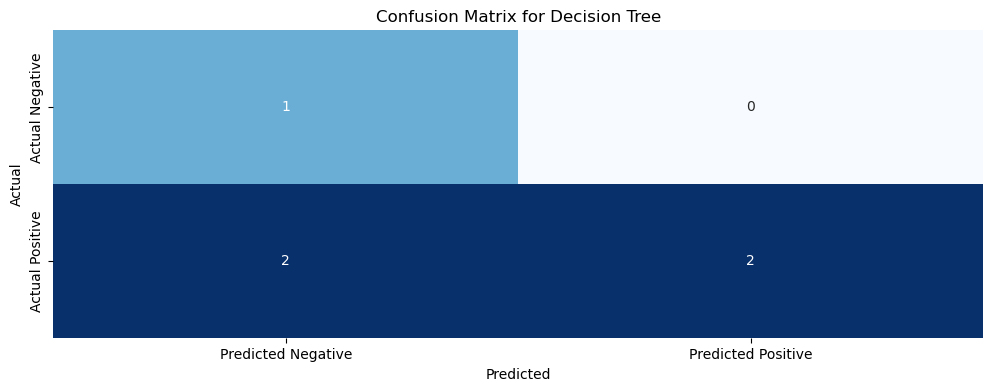

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=10)
y_pred_dt = show_kfold_cross_validation(dt_classifier, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

### Random Forest Classifier

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 0.800
Confusion Matrix for Random Forest
[[1 0]
 [1 3]]


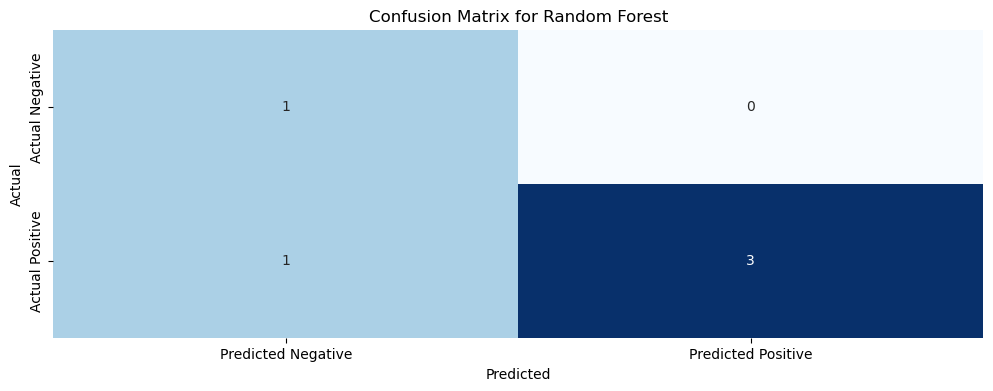

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
y_pred_rf = show_kfold_cross_validation(rf_classifier, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## Conclusion

In conclusion, the KNN and Random Forest models performed the best on correctly classifying samples from the test set. Each model received an accuracy score of 80%, indicating that these models perform effectively in distinguishing between problem-solving and recall activities based on the area under the curve data. However, it is important to note that overfitting may be present in these models, notably Logistic Regression, SVM, and Decision Tree since there was a significant discrepancy between the mean and test accuracies, with the mean accuracy being 100% across all folds of cross validation. 